In [1]:
import matplotlib.pyplot as plt
from razredi import Tocka
from jarvis_march import grid_peel_jarvis_enakomerna
from graham_scan import grid_peel_graham_enakomerna, grid_peel_graham_cantor, grid_peel_graham_potencna
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

In [46]:
#graham = grid_peel_graham_enakomerna(300,300)
#jarvis = grid_peel_jarvis_enakomerna(100,100)

# Funkcija za risanje grafov

In [2]:
def narisi(rezultat_grid_peel):
    slovar_ovojnic = rezultat_grid_peel[1]
    for i in range(len(slovar_ovojnic)):
        seznam_x = []
        seznam_y = []
        for tocka in slovar_ovojnic[i]:
            seznam_x.append(tocka.x)
            seznam_y.append(tocka.y)
        seznam_x += [seznam_x[0]]
        seznam_y += [seznam_y[0]]
        plt.plot(seznam_x,seznam_y,"-o")

(-4.95, 103.95, -4.95, 103.95)

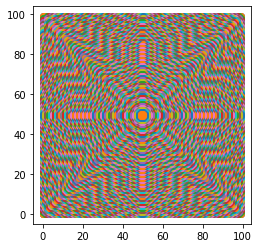

In [39]:
f = plt.figure()
narisi(jarvis)
narisi(graham)
plt.axis('square')
#f.savefig("11x11.png", bbox_inches='tight', dpi=600)

In [3]:
sez_x = []
sez_y = []
sez_z = []
for i in range(50):
    for j in range(50):
        st = grid_peel_graham_enakomerna(i,j)
        sez_x.append(i)
        sez_y.append(j)
        sez_z.append(len(st[1]))

In [ ]:
graham_potencna = grid_peel_graham_potencna(5,5)
f = plt.figure()
narisi(graham_potencna)
plt.axis('square')
#f.savefig("5x5_potencna.png", bbox_inches='tight', dpi=600)

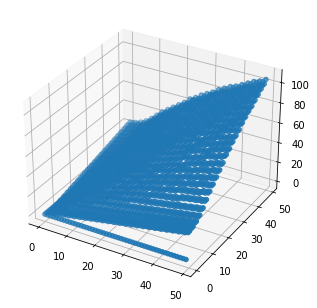

In [28]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(sez_x,sez_y,sez_z)

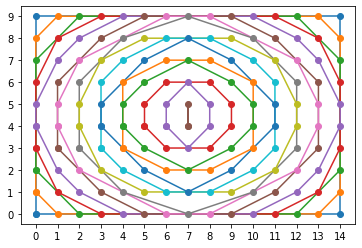

In [4]:
graham_10x15 = grid_peel_graham_enakomerna(15,10)
g = plt.figure()
narisi(graham_10x15)
plt.xticks(list(range(15)))
plt.yticks(list(range(10)))
#plt.savefig("15x10_enakomerna.jpg",bbox_inches='tight', dpi=300)

In [51]:
def narisi_brez_pikic(rezultat_grid_peel):
    slovar_ovojnic = rezultat_grid_peel[1]
    for i in range(len(slovar_ovojnic)):
        seznam_x = []
        seznam_y = []
        for tocka in slovar_ovojnic[i]:
            seznam_x.append(tocka.x)
            seznam_y.append(tocka.y)
        seznam_x += [seznam_x[0]]
        seznam_y += [seznam_y[0]]
        plt.plot(seznam_x,seznam_y,"-")

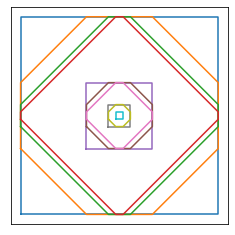

In [53]:
graham_cant = grid_peel_graham_cantor(4)
narisi_brez_pikic(graham_cant)
plt.xticks([])
plt.yticks([])
plt.axis('square')
#plt.savefig("kvazi_cantor.jpg",bbox_inches='tight', dpi=300)

# Merjenje časa

In [86]:
def izmeri_cas_enakomerna(velikost_mreze):
    seznam_graham = []
    seznam_jarvis = []
    for i in range(15,velikost_mreze):
        graham_c = grid_peel_graham_enakomerna(i,i)[2]
        jarvis_c = grid_peel_jarvis_enakomerna(i,i)[2]
        seznam_graham.append((i,graham_c))
        seznam_jarvis.append((i,jarvis_c))
    return (seznam_graham, seznam_jarvis)

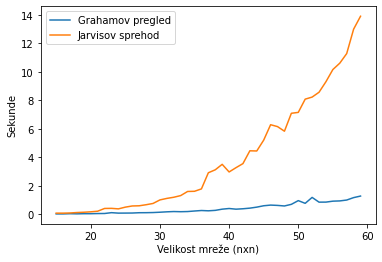

In [93]:
cas_g, cas_j = izmeri_cas(60)
graf_cas = plt.figure()
plt.plot(*zip(*cas_g), label = "Grahamov pregled")
plt.plot(*zip(*cas_j), label = "Jarvisov sprehod")
plt.xlabel("Velikost mreže (nxn)")
plt.ylabel("Sekunde")
plt.legend()
#plt.savefig("cas.jpg",bbox_inches='tight', dpi=300)

In [64]:
def izmeri_cas_cant(velikost_mreze):
    seznam_graham = []
    seznam_graham_c = []
    seznam_graham_p = []
    for i in range(15,velikost_mreze):
        graham_c = grid_peel_graham_enakomerna(2*i,2*i)[2]
        graham_cant_c = grid_peel_graham_cantor(i)[2]
        graham_potencna = grid_peel_graham_potencna(2*i,2*i)[2]
        seznam_graham.append((i,graham_c))
        seznam_graham_c.append((i,graham_cant_c))
        seznam_graham_p.append((i,graham_potencna)) 
    return (seznam_graham, seznam_graham_c, seznam_graham_p)

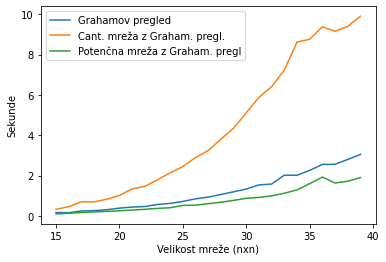

In [67]:
cas_g, cas_cant, cas_p = izmeri_cas_cant(40)
graf_cas_cant = plt.figure()
plt.plot(*zip(*cas_g), label = "Grahamov pregled")
plt.plot(*zip(*cas_cant), label = "Cant. mreža z Graham. pregl.")
plt.plot(*zip(*cas_p), label = "Potenčna mreža z Graham. pregl")
plt.xlabel("Velikost mreže (nxn)")
plt.ylabel("Sekunde")
plt.legend()
#plt.savefig("primerjava_casov.jpg",bbox_inches='tight', dpi=300)

In [3]:
def st_ovojnic(velikost_mreze):
    seznam_graham_e = []
    st_graham_e = []
    seznam_graham_c = []
    st_graham_c = []
    seznam_graham_p = []
    st_graham_p = []
    for i in range(velikost_mreze):
        graham_e = len(grid_peel_graham_enakomerna(2*i,2*i)[1])
        graham_c = len(grid_peel_graham_cantor(i)[1])
        graham_p = len(grid_peel_graham_potencna(2*i,2*i)[1])
        seznam_graham_e.append((i, graham_e))
        seznam_graham_c.append((i,graham_c))
        seznam_graham_p.append((i,graham_p))
        st_graham_e.append(graham_e)
        st_graham_c.append(graham_c)
        st_graham_p.append(graham_p)
    return (seznam_graham_e, seznam_graham_c, seznam_graham_p, st_graham_e, st_graham_c, st_graham_p)
seznami = st_ovojnic(35)

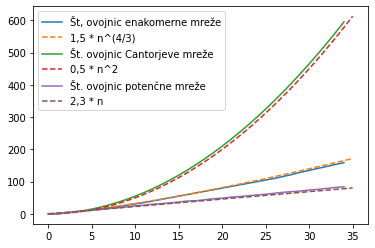

In [10]:
def power_law(x, a, b):
    return a*np.power(x, b)
x = [i for i in range(35)]
x1 = np.linspace(0, 35, 10000)
graf = plt.figure()
pars_c, cov_c = curve_fit(f=power_law, xdata=x, ydata=seznami[4])
pars_p, cov_p = curve_fit(f=power_law, xdata=x, ydata=seznami[5])#print(pars_c)
#print(pars_p)
plt.plot(*zip(*seznami[0]), label = "Št, ovojnic enakomerne mreže")
plt.plot(x1, 1.5 * x1 ** (4/3), label = "1,5 * n^(4/3)", linestyle="dashed")
plt.plot(*zip(*seznami[1]), label = "Št. ovojnic Cantorjeve mreže")
plt.plot(x1, 0.5 * x1 ** 2, label = "0,5 * n^2", linestyle="dashed")
plt.plot(*zip(*seznami[2]), label = "Št. ovojnic potenčne mreže")
plt.plot(x1, 2.3 * x1, label = "2,3 * n", linestyle="dashed")
plt.legend()
#plt.savefig("slike/st_ovojnic.jpg",bbox_inches='tight', dpi=600)